In [ ]:
!pip install ultralytics -q
!pip install gradio -q
!pip install pandas -q
!pip install deepface -q
!pip install pillow -q
!pip install opencv-python -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
  Preparing metadata (setup.py) ... d

In [ ]:
!unzip /content/attendancesystem.zip

Archive:  /content/attendancesystem.zip
   creating: attendancesystem/.ipynb_checkpoints/
  inflating: attendancesystem/.ipynb_checkpoints/requirements-checkpoint.txt  
  inflating: attendancesystem/.ipynb_checkpoints/test-01-checkpoint.ipynb  
  inflating: attendancesystem/.ipynb_checkpoints/Untitled-checkpoint.ipynb  
  inflating: attendancesystem/best.pt  
  inflating: attendancesystem/classroom3.jpg  
   creating: attendancesystem/database/
   creating: attendancesystem/database/60009210123/
  inflating: attendancesystem/database/60009210123/1.jpg  
  inflating: attendancesystem/database/60009210123/10.jpg  
  inflating: attendancesystem/database/60009210123/2.jpg  
  inflating: attendancesystem/database/60009210123/3.jpg  
  inflating: attendancesystem/database/60009210123/4.jpg  
  inflating: attendancesystem/database/60009210123/5.jpg  
  inflating: attendancesystem/database/60009210123/6.jpg  
  inflating: attendancesystem/database/60009210123/7.jpg  
  inflating: attendancesys

In [ ]:
# Import necessary libraries
from ultralytics import YOLO
from ultralytics.engine.results import Results
from deepface import DeepFace
from PIL import Image
import gradio as gr
import shutil
import pandas
import cv2
import os

24-05-01 08:40:59 - Directory /root/.deepface created
24-05-01 08:40:59 - Directory /root/.deepface/weights created


In [ ]:
"""def faceRecognition(input_image):

    # Path to the directory containing cropped objects
    cropped_objects_dir = "./faces/"

    # Initialize a list to store the extracted names
    extracted_names = []

    file_to_delete = "./database/representations_facenet512.pkl"
    if os.path.exists(file_to_delete):
        os.remove(file_to_delete)

    # Iterate through the image files in the directory
    for filename in os.listdir(cropped_objects_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(cropped_objects_dir, filename)
            model = DeepFace.find(img_path=img_path, db_path="/content/attendancesystem/database", distance_metric = "euclidean",enforce_detection=False, model_name="Facenet512")

            # Check if a face was recognized in the image
            if model and len(model[0]['identity']) > 0:
                # Extract the name and append it to the list
                name = model[0]['identity'][0].split('/')[4]
            else:
                # If no face is recognized, set name to 'unknown'
                name = 'unknown'

            extracted_names.append(name)

    return extracted_names

In [ ]:
def faceRecognition(input_image):
    # Path to the directory containing cropped objects
    cropped_objects_dir = "./faces/"

    # Initialize lists to store the extracted names and predicted image filenames
    extracted_names = []
    predicted_image_filenames = []

    file_to_delete = "./database/representations_facenet512.pkl"
    if os.path.exists(file_to_delete):
        os.remove(file_to_delete)

    # Iterate through the image files in the directory
    for filename in os.listdir(cropped_objects_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(cropped_objects_dir, filename)
            model = DeepFace.find(img_path=img_path, db_path="/content/attendancesystem/database", enforce_detection=False, model_name="Facenet512")

            # Check if a face was recognized in the image
            if model and len(model[0]['identity']) > 0:
                # Extract the name and append it to the list
                name = model[0]['identity'][0].split('/')[4]
                extracted_names.append(name)
                # Append the predicted image filename to the list
                predicted_image_filenames.append(filename)
            else:
                # If no face is recognized, set name to 'unknown'
                name = 'unknown'
                extracted_names.append(name)
                # Append the predicted image filename to the list
                predicted_image_filenames.append(filename)

    return extracted_names, predicted_image_filenames


In [ ]:
"""def faceRecognition(input_image):
    # Path to the directory containing cropped objects
    cropped_objects_dir = "./faces/"

    # Initialize lists to store the extracted names and predicted image filenames
    extracted_names = []
    predicted_image_filenames = []

    file_to_delete = "./database/representations_facenet512.pkl"
    if os.path.exists(file_to_delete):
        os.remove(file_to_delete)

    # Iterate through the image files in the directory
    for filename in os.listdir(cropped_objects_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(cropped_objects_dir, filename)
            model = DeepFace.find(img_path=img_path, db_path="/content/attendancesystem/database",distance_metric = "euclidean", enforce_detection=False, model_name="Facenet512")

            # Check if a face was recognized in the image
            if model and len(model[0]['identity']) > 0:
                # Extract the name and append it to the list
                name = model[0]['identity'][0].split('/')[4]
                extracted_names.append(name)
                # Append the predicted image filename to the list
                predicted_image_filenames.append(filename)
            else:
                # If no face is recognized, set name to 'unknown'
                name = 'unknown'
                extracted_names.append(name)
                # Append the predicted image filename to the list
                predicted_image_filenames.append(filename)

    return extracted_names, predicted_image_filenames


In [ ]:
def faceExtraction(input_image, model, results):
    # Load the image
    image = Image.open(input_image)
    detected_objects = []

    if hasattr(results, 'boxes') and hasattr(results, 'names'):
        for box in results.boxes.xyxy:
            object_id = int(box[-1])
            object_name = results.names.get(object_id)
            x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])

            detected_objects.append((object_name, (x1, y1, x2, y2)))

    # Create or clear the 'faces' directory
    if os.path.exists("faces"):
        shutil.rmtree("faces")
    os.makedirs("faces")

    # Crop and save each detected object
    for i, (object_name, (x1, y1, x2, y2)) in enumerate(detected_objects):
        object_image = image.crop((x1, y1, x2, y2))
        object_image.save(f"faces/face{i}.jpg")

    return 0

In [ ]:
def faceDetection(input_image):
    model = YOLO('/content/attendancesystem/best.pt')
    results: Results = model.predict(input_image)[0]

    return faceExtraction(input_image, model, results)

In [ ]:
image = input("enter image path : ")
faceDetection(image)
names, image = faceRecognition(image)
print(names)
print(image)

enter image path : /content/attendancesystem/classroom3.jpg

image 1/1 /content/attendancesystem/classroom3.jpg: 384x640 31 faces, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
24-05-01 09:43:30 - Searching ./faces/face20.jpg in 360 length datastore
24-05-01 09:43:30 - find function duration 0.3524796962738037 seconds
24-05-01 09:43:30 - Searching ./faces/face6.jpg in 360 length datastore
24-05-01 09:43:31 - find function duration 0.3601350784301758 seconds
24-05-01 09:43:31 - Searching ./faces/face30.jpg in 360 length datastore
24-05-01 09:43:31 - find function duration 0.3356311321258545 seconds
24-05-01 09:43:31 - Searching ./faces/face5.jpg in 360 length datastore
24-05-01 09:43:31 - find function duration 0.35079169273376465 seconds
24-05-01 09:43:31 - Searching ./faces/face0.jpg in 360 length datastore
24-05-01 09:43:32 - find function duration 0.3474907875061035 seconds
24-05-01 09:43:32 - Searching ./faces/face11.jpg in 36

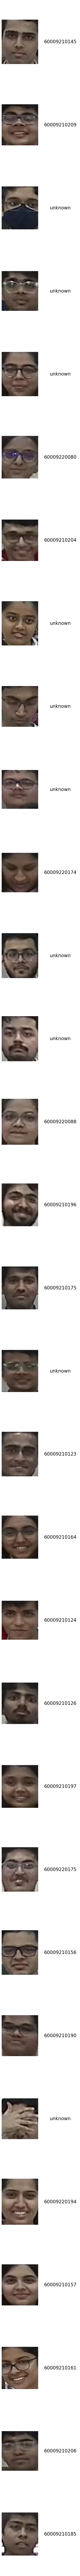

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_predicted_images(image_list, names, folder_path):
    num_images = len(image_list)

    # Create a grid of subplots with two columns
    fig, axes = plt.subplots(num_images, 2, figsize=(5, 5*num_images))

    # Iterate over images and corresponding names
    for i, (image_name, predicted_label) in enumerate(zip(image_list, names)):
        # Load and plot image
        img_path = os.path.join(folder_path, image_name)
        img = mpimg.imread(img_path)
        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')

        # Set title as the predicted label
        axes[i, 1].text(0.5, 0.5, predicted_label, fontsize=20, ha='center', va='center')

        # Remove axis from the label subplot
        axes[i, 1].axis('off')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Example usage
image_list = image

folder_path = '/content/faces'

# Plot predicted images
plot_predicted_images(image_list, names, folder_path)


# MTCNN AND FACENET

In [ ]:
def faceRecognition(input_image):
    # Path to the directory containing cropped objects
    cropped_objects_dir = "./faces/"

    # Initialize lists to store the extracted names and predicted image filenames
    extracted_names = []
    predicted_image_filenames = []

    file_to_delete = "./database/representations_facenet512.pkl"
    if os.path.exists(file_to_delete):
        os.remove(file_to_delete)

    # Iterate through the image files in the directory
    for filename in os.listdir(cropped_objects_dir):
        if filename.endswith(".jpg"):
            img_path = os.path.join(cropped_objects_dir, filename)
            model = DeepFace.find(img_path=img_path, db_path="/content/attendancesystem/database",distance_metric ="euclidean_l2", enforce_detection=False, model_name="Facenet512")

            # Check if a face was recognized in the image
            if model and len(model[0]['identity']) > 0:
                # Extract the name and append it to the list
                name = model[0]['identity'][0].split('/')[4]
                extracted_names.append(name)
                # Append the predicted image filename to the list
                predicted_image_filenames.append(filename)
            else:
                # If no face is recognized, set name to 'unknown'
                name = 'unknown'
                extracted_names.append(name)
                # Append the predicted image filename to the list
                predicted_image_filenames.append(filename)

    return extracted_names, predicted_image_filenames


In [ ]:
def faceExtraction(input_image, model, results):
    # Load the image
    image = input_image

    detected_faces = []

    if results:
        for result in results:
            x, y, width, height = result['box']
            x1, y1, x2, y2 = x, y, x + width, y + height
            detected_faces.append(('face', (x1, y1, x2, y2)))

    # Create or clear the 'faces' directory
    if os.path.exists("faces"):
        shutil.rmtree("faces")
    os.makedirs("faces")

    # Crop and save each detected face
    for i, (object_name, (x1, y1, x2, y2)) in enumerate(detected_faces):
        face_image = image[y1:y2, x1:x2]
        cv2.imwrite(f"faces/face{i}.jpg", face_image)

    return detected_faces

In [ ]:
import cv2
from mtcnn import MTCNN

def faceDetection(image_path):
    # Load the input image using OpenCV
    input_image = cv2.imread(image_path)

    if input_image is None:
        print("Error: Unable to load the input image.")
        return

    # Create an instance of the MTCNN detector
    detector_mtcnn = MTCNN()

    # Detect faces in the input image
    results = detector_mtcnn.detect_faces(input_image)

    return faceExtraction(input_image, detector_mtcnn, results)

# Rest of the code remains the same


In [ ]:
image = input("enter image path : ")
faceDetection(image)
names, image = faceRecognition(image)
print(names)
print(image)

enter image path : /content/attendancesystem/classroom3.jpg
5/5 [==============================] - 1s 4ms/step
24-05-01 11:09:59 - Found 360 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations: 100%|██████████| 360/360 [02:21<00:00,  2.55it/s]


24-05-01 11:12:20 - There are now 360 representations in ds_model_facenet512_detector_opencv_aligned_normalization_base_expand_0.pkl
24-05-01 11:12:20 - Searching ./faces/face20.jpg in 360 length datastore
24-05-01 11:12:20 - find function duration 141.6163866519928 seconds
24-05-01 11:12:20 - Searching ./faces/face6.jpg in 360 length datastore
24-05-01 11:12:21 - find function duration 0.3455934524536133 seconds
24-05-01 11:12:21 - Searching ./faces/face5.jpg in 360 length datastore
24-05-01 11:12:21 - find function duration 0.3482203483581543 seconds
24-05-01 11:12:21 - Searching ./faces/face0.jpg in 360 length datastore
24-05-01 11:12:21 - find function duration 0.3741791248321533 seconds
24-05-01 11:12:21 - Searching ./faces/face11.jpg in 360 length datastore
24-05-01 11:12:22 - find function duration 0.34630656242370605 seconds
24-05-01 11:12:22 - Searching ./faces/face28.jpg in 360 length datastore
24-05-01 11:12:22 - find function duration 0.3510622978210449 seconds
24-05-01 11:

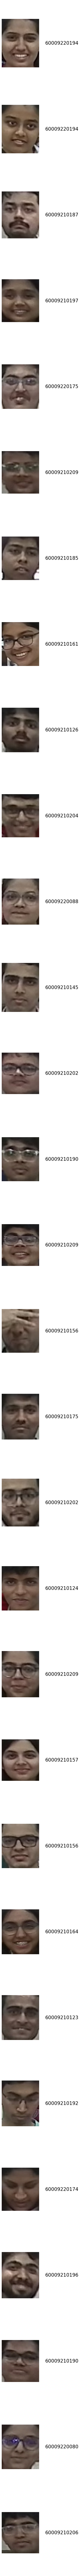

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_predicted_images(image_list, names, folder_path):
    num_images = len(image_list)

    # Create a grid of subplots with two columns
    fig, axes = plt.subplots(num_images, 2, figsize=(5, 5*num_images))

    # Iterate over images and corresponding names
    for i, (image_name, predicted_label) in enumerate(zip(image_list, names)):
        # Load and plot image
        img_path = os.path.join(folder_path, image_name)
        img = mpimg.imread(img_path)
        axes[i, 0].imshow(img)
        axes[i, 0].axis('off')

        # Set title as the predicted label
        axes[i, 1].text(0.5, 0.5, predicted_label, fontsize=20, ha='center', va='center')

        # Remove axis from the label subplot
        axes[i, 1].axis('off')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

# Example usage
image_list = image

folder_path = '/content/faces'

# Plot predicted images
plot_predicted_images(image_list, names, folder_path)
